# PREDICTING THE LIKELIHOOD OF E-SIGNING A LOAN BASED ON FINANCIAL HISTORY

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import time

In [2]:
dataset = pd.read_csv('financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## EDA

### Data Cleaning

In [5]:
# Looking for any value that is null
dataset.isna()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Looking for any column with null values
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

### Histograms

Creating a new dataset with non-categorical variables only and without the id variable:

In [7]:
dataset2 = dataset.drop(['entry_id','pay_schedule','e_signed'],axis=1)

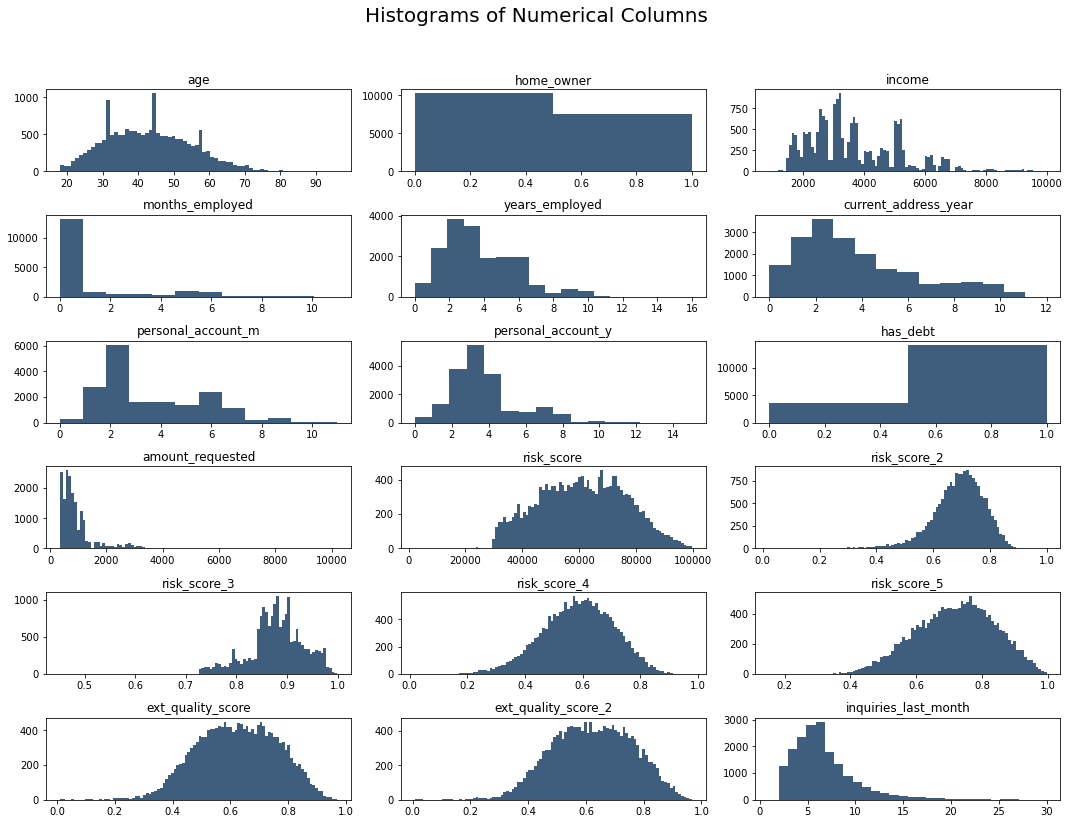

In [8]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Correlation with response variables

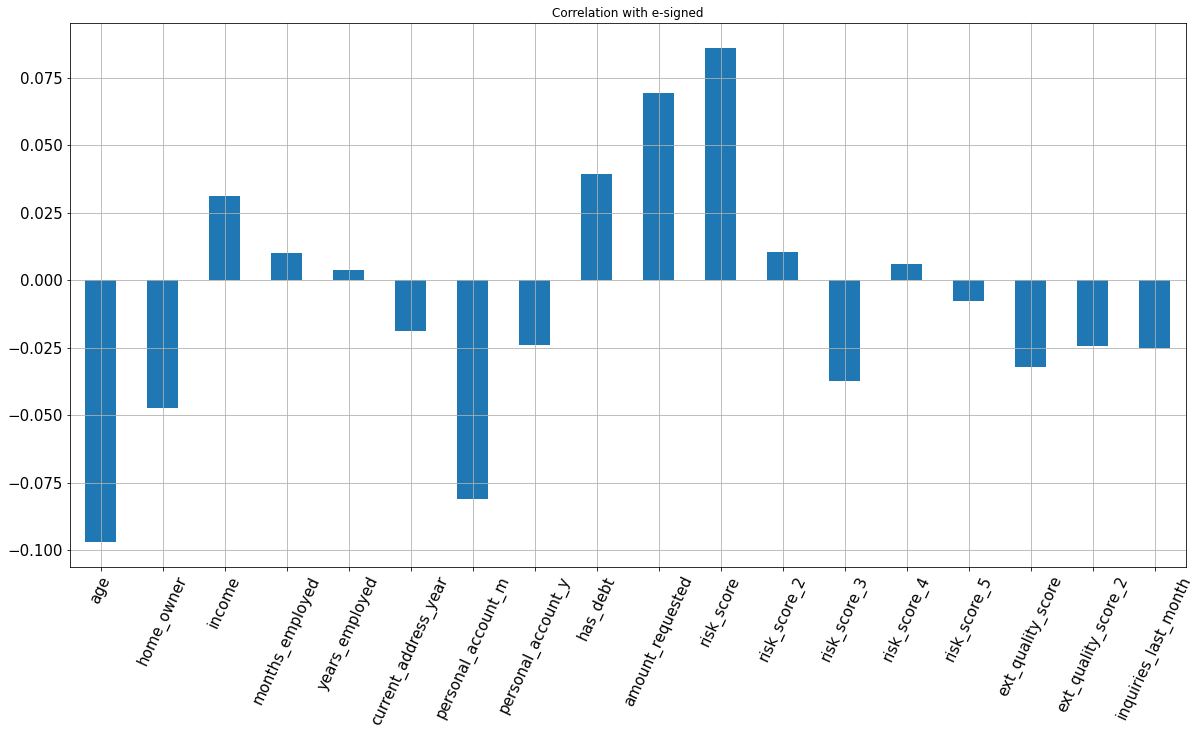

In [9]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(20,10),title='Correlation with e-signed', grid = True, rot=65,  fontsize=15)
plt.show()

NOTE : the graph above shows the linear correlation between each variable and the dependent variable. This may not be the correlation found when running models that are not linear in nature (Random Forest for example). However, it is still interesting the know the linear correlation for each of those variables.

#### Heatmap of the Correlation Matrix

<AxesSubplot:>

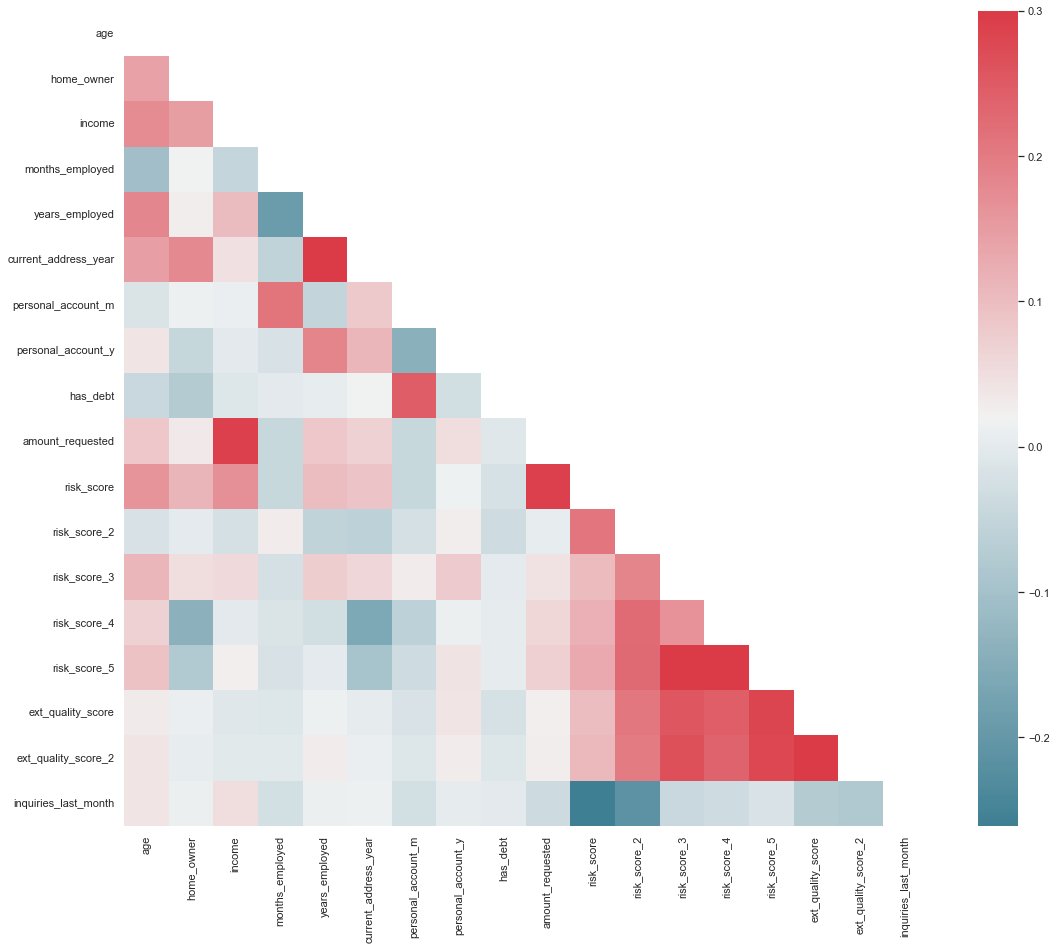

In [10]:
# Style setting
sns.set(style='white')

# Computing the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap = cmap, vmax=.3)

## Data Preprocessing

In [11]:
# we use a seed so that our results from the model we build will always be the same no matter which session we are in
random.seed(100)

### Feature Engineering

Get rid of non-accurate or non-relevant variables:

In [12]:
# We priviously found out that the months_employed was not accurate since most of the data had a value of 0.
dataset = dataset.drop('months_employed',axis=1)

In [13]:
# Bringing personal_account_m and personal_account_y into one variable
dataset['personal_account_month'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))

In [14]:
dataset[['personal_account_m','personal_account_y','personal_account_month']].head()

,personal_account_m,personal_account_y,personal_account_month
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [15]:
# Let's drop the old columns
dataset = dataset.drop(['personal_account_m','personal_account_y'],axis=1)

### One Hot Encoding

In [16]:
dataset = pd.get_dummies(dataset)

In [17]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_month', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [18]:
# Removing one base variable for each dummy variable. We can also do so by adding the argument: dummy_na: 'bool' = False
dataset = dataset.drop('pay_schedule_semi-monthly', axis=1) 

### Removing extra columns

Removing some columns that are useful but that cannot take part in the training set (e.g. response variable, and the user_id).

In [19]:
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(["e_signed", "entry_id"], axis=1)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) # The tranform function turns the result into a numpy array which 
# loses its index and the column, this is why here we turn it back into a DataFrame 
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values # matching indexes of the old dataframe and the scaled dataframe
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model Building - comparing different models

### 1) Logistic regression

##### Fitting Model to the Training Set

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty='l2') # it is a classification problem so we use the classifier model
classifier.fit(X_train, y_train) # fitting the model to the training set

LogisticRegression(random_state=0)

##### Predicting Test Set

In [39]:
y_pred = classifier.predict(X_test)

##### Evaluating Results

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred) # tp / (tp + fp)
rec = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

Putting the results in a pandas DataFrame:

In [41]:
results = pd.DataFrame([['Linear Regression (Lasso)',acc,prec,rec,f1]],columns=[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817


### 2) Support Vector Machine (SVM) - Linear kernel

##### Fitting Model to the Training Set

In [33]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel='linear') # here we are using a linear kernel
classifier.fit(X_train, y_train) # fitting the model to the training set

SVC(kernel='linear', random_state=0)

##### Predicting Test Set

In [34]:
y_pred = classifier.predict(X_test)

##### Evaluating Results

In [35]:
acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred) # tp / (tp + fp)
rec = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

Putting the results in a pandas DataFrame:

In [36]:
SVM_results = pd.DataFrame([['SVM (Linear)',acc,prec,rec,f1]],columns=[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])
SVM_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.568398,0.577832,0.735477,0.647193


In [42]:
results_table = results.append(SVM_results, ignore_index = True)
results_table

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193


### 3) Support Vector Machine (SVM) - Radial Basis Function (RBF) kernel

##### Fitting Model to the Training Set

In [43]:
classifier = SVC(random_state = 0, kernel='rbf') # here we are using a linear kernel
classifier.fit(X_train, y_train) # fitting the model to the training set

SVC(random_state=0)

##### Predicting Test Set

In [44]:
y_pred = classifier.predict(X_test)

##### Evaluating Results

In [45]:
acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred) # tp / (tp + fp)
rec = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

Putting the results in a pandas DataFrame:

In [48]:
rbf_results = pd.DataFrame([['SVM (RBF)',acc,prec,rec,f1]],columns=[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])
rbf_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (RBF),0.591569,0.60573,0.690871,0.645505


In [49]:
total_results = results_table.append(rbf_results, ignore_index = True)
total_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505


### 4) Random Forest

##### Fitting Model to the Training Set

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100) # here we are using a linear kernel
classifier.fit(X_train, y_train) # fitting the model to the training set

RandomForestClassifier(random_state=0)

##### Predicting Test Set

In [51]:
y_pred = classifier.predict(X_test)

##### Evaluating Results

In [52]:
acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred) # tp / (tp + fp)
rec = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

Putting the results in a pandas DataFrame:

In [53]:
rf_results = pd.DataFrame([['Random Forest',acc,prec,rec,f1]],columns=[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])
rf_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.62507,0.642336,0.684647,0.662817


In [54]:
final_results = total_results.append(rf_results, ignore_index = True)
final_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.625070,0.642336,0.684647,0.662817


The Random Forest model is the more efficient so we will use this model for the next steps.

## K-fold Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10) # X and y come from the RF model (last one we used)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.02)


The accuracy is even higher than the run we did in the results part. 0.63 is very close to 62.5 which means that the results are consistent and hence reliable.

## Parameter Tuning

Here, we will try to apply different parameters to the model we chose to improve its efficiency.

### Applying Grid Search (we use the Grid Search only for Random Forest)

### 1) Gini

#### Round 1: Gini

In [56]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

In [57]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [58]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 1417.52 seconds


In [59]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

#### Round 2: Gini

In [60]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

In [61]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [62]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 775.40 seconds


In [63]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.635420816975755,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

**Predicting Test Set based on the best model with Gini (here, Round 2):**

In [73]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [83]:
Gini_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# We are not running this cell here as it takes too long to re run the whole code
# However, the idea is to compare Gini with Entropy as well as all the previous models we've tried

### 2) Entropy

#### Round 1: Entropy

In [64]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [65]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [66]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 2066.39 seconds


In [67]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

#### Round 2: Entropy

In [68]:
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

In [69]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [70]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 675.20 seconds


In [71]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6356302654508454,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 12})

**Predicting Test Set based on the best model with Entropy (here, Round 2):**

In [80]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [81]:
entropy_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# We are not running this cell here as it takes too long to re run the whole code
# However, the idea is to compare Gini with Entropy as well as all the previous models we've tried

**CONCLUSION**

The difference between Gini and Entropy is based on the splitting criteria: 
- Entropy maximises the information that we keep after each split
- Gini minimises the probability of mislabelling

## Formatting final results

Here we map the actual outcome for each user with our predictions based on our best model (Random Forest, Entropy):

In [84]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred # the last time we called y-pred was with rf, entropy so these are 
# the predictions we want to use
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [85]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,1
